In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sn

In [1]:
import pandas as pd
df = pd.read_excel('D:/CBE_project_Title/LOAN WITH COLLATERAL/cleaned_data_EDA.xlsx')
df

,DISTRICTNAME,REGIONNAME,CBE_REGION,BRANCHNAME,CONTRACT_CODE,APPROVED_AMOUNT,GRANT_DATE,EXPIRY_DATE,TENURE,TERM,...,RISK_GRADE,ECONOMIC_SECTOR,INDUSTRY,OWNERSHIP,SECTOR,TERM_OF_PAYMENT,PRODUCT_OWNER,COLLATTERAL,COLLATERAL_VALUE,year
0,ARADA,ADDIS ABABA,CENTRAL,Addis Ababa Branch,1000000889907,8.000000e+07,2024-01-26,2025-01-26,Short Term,SHORT TERM,...,RG3,Manufacturing,Manufacture of alcoholic drink,PUBLIC,Manufacturing,Monthly,PUBLIC AND COOPERATIVE CREDIT,"Factory Machinery;Motor vehicles;Premises, Bui...",3.245942e+08,2025
1,ARADA,ADDIS ABABA,CENTRAL,Addis Ababa Branch,1000000894811,1.000000e+07,2020-04-23,2025-03-27,Short Term,SHORT TERM,...,RG3,Export,Tannery,PRIVATE,Individual,Monthly,Corporate Credit,Factory Building;Factory Machinery,7.531505e+07,2025
2,ARADA,ADDIS ABABA,CENTRAL,Addis Ababa Branch,1000000894978,5.000000e+06,2022-12-23,2023-11-08,Short Term,SHORT TERM,...,RG4,Export,"Export -Pulses,Oilseeds cake,Sesame",PRIVATE,Export,Monthly,BUSINESS CREDIT,Automobile;Dry Cargo;Residential Houses,4.148046e+07,2023
3,ARADA,ADDIS ABABA,CENTRAL,Addis Ababa Branch,1000000908359,1.000000e+08,2023-05-10,2024-04-27,Short Term,SHORT TERM,...,RG1,Manufacturing,Manufactureof basic iron and steel,PRIVATE,Manufacturing,Monthly,Corporate Credit,Factory Building,1.000000e+08,2024
4,ARADA,ADDIS ABABA,CENTRAL,Addis Ababa Branch,1000000909045,1.380000e+07,2023-04-11,2024-04-11,Short Term,SHORT TERM,...,RG3,Export,Export of cereals,PRIVATE,Export,Monthly,LOAN WORKOUT,"Premises, Buildings & Houses",1.275533e+07,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73823,CONSUMER WEST ADDIS,ADDIS ABABA,CENTRAL,West Addis Cons Loan,1000147302537,1.334494e+05,2015-12-12,2035-12-12,Long Term,LONG TERM,...,RG3,Consumer and staff loans,Other individuals,PRIVATE,Individual,Monthly,CONSUMER WEST ADDIS,Condominium,2.000146e+11,2035
73824,CONSUMER NORTH ADDIS,ADDIS ABABA,CENTRAL,North Addis Cons LOAN,1000170205999,2.075904e+05,2012-03-30,2027-03-29,Long Term,LONG TERM,...,RG3,Consumer and staff loans,Other individuals,PRIVATE,Individual,Monthly,CONSUMER NORTH ADDIS,Condominium,2.200417e+05,2027
73825,SHIRE,TIGRAY,NORTH EAST,Adwa Branch,1000028389527,1.023028e+05,2011-07-30,2026-07-29,Long Term,LONG TERM,...,RG3,Consumer and staff loans,Other individuals,PRIVATE,Individual,Monthly,SHIRE,Condominium,1.193536e+05,2026
73826,KIRKOS,ADDIS ABABA,CENTRAL,BALCHA ABANEFSO BRANCH,1000131325146,2.880600e+05,2021-10-01,2026-11-08,Medium Term,SHORT TERM,...,RG3,Consumer and staff loans,Other individuals,PRIVATE,Individual,Monthly,KIRKOS,Condominium,3.487563e+05,2026


In [6]:
NPL = "NPL"  # Replace with the actual value you want to assign

df.loc[df.LOAN_STATUS == "LOS", "LOAN_STATUS"] = NPL
df.loc[df.LOAN_STATUS == "SUB", "LOAN_STATUS"] = NPL
df.loc[df.LOAN_STATUS == "DOU", "LOAN_STATUS"] = NPL

## Important features 
1. DISTRICTNAME
2. REGIONNAME
3. CBE_REGION
4. BRANCHNAME
5. CONTRACT_CODE
6. CUSTOMER_ID
7. APPROVED_AMOUNT
8. GRANT_DATE
9. EXPIRY_DATE
10. TENURE
11. TERM
12. LOAN_TYPE
13. LOAN_DESCRIPTION
14. LOAN_PRODUCT
15. LTYPE
16. CUST_SHORTNAME
17. LOAN_STATUS
18. NBE_LOAN_STATUS
19. INTEREST_RATE
20. INSTALLMENT_AMOUNT
21. TERM_OF_PAYMENT
22. RISK_GRADE
23. DATE_RATED
24. ECONOMIC_SECTOR
25. INDUSTRY
26. OWNERSHIP
27. CRC_SECTOR
28. PRODUCT_OWNER
29. LOANID
30. SEGMENT_TYPE
## Required features while not include
1. collateral
2. currency type 

# Questions?
# 1. difference between TENURE and TERM 
- short
- medium
- long
# 2. differnce between 
## LTYPE 
- AA== aragment 
- OD == over derft 
- LD= ifb
## LOAN_TYPE
- TL= trm loan
- OD= short term
- IFB

## under waiting list features 
1.  CO_CODE
2. ARRNGEMENT_ID
3. RELATIONSHIP_MANAGER
4. LINE_NO
5. ACCT_OFFICER_CODE
6. DAO_NAME
7. DAO_CODE
8. PROD_CODE
9. BUSINESS_DATE
10. PRINCIPAL_OS
11. INTEREST_OS
12. PRINCIPAL_ARREARS
13. INTEREST_ARREARS
14. CURRENT_COMMITTMENT
15. IS_GOVT_BACKED
16. INSTALLMENT_FREQ_PRINCIPAL
17. INSTALLMENT_FREQ_INTEREST
18. UNEARNED_INCOME_MURABAHA

In [6]:
df.columns

Index(['DISTRICTNAME', 'REGIONNAME', 'CBE_REGION', 'BRANCHNAME',
       'CONTRACT_CODE', 'CUSTOMER_ID', 'CO_CODE', 'APPROVED_AMOUNT',
       'GRANT_DATE', 'EXPIRY_DATE', 'TENURE', 'TERM', 'LOAN_TYPE',
       'LOAN_DESCRIPTION', 'LOAN_PRODUCT', 'ARRNGEMENT_ID',
       'RELATIONSHIP_MANAGER', 'LTYPE', 'CUST_SHORTNAME', 'LINE_NO',
       'ACCT_OFFICER_CODE', 'DAO_NAME', 'DAO_CODE', 'PROD_CODE',
       'BUSINESS_DATE', 'PRINCIPAL_OS', 'INTEREST_OS', 'LOAN_STATUS',
       'NBE_LOAN_STATUS', 'PRINCIPAL_ARREARS', 'INTEREST_ARREARS',
       'CURRENT_COMMITTMENT', 'IS_GOVT_BACKED', 'INTEREST_RATE',
       'INSTALLMENT_AMOUNT', 'INSTALLMENT_FREQ_PRINCIPAL',
       'INSTALLMENT_FREQ_INTEREST', 'UNEARNED_INCOME_MURABAHA',
       'TERM_OF_PAYMENT', 'RISK_GRADE', 'DATE_RATED', 'ECONOMIC_SECTOR',
       'INDUSTRY', 'OWNERSHIP', 'CRC_SECTOR', 'PRODUCT_OWNER', 'LOANID',
       'SEGMENT_TYPE'],
      dtype='object')

In [23]:
df['TENURE'].value_counts()

TENURE
Long Term      223
Medium Term     43
Short Term      30
Name: count, dtype: int64

In [8]:
df.dtypes

DISTRICTNAME                          object
REGIONNAME                            object
CBE_REGION                            object
BRANCHNAME                            object
CONTRACT_CODE                         object
CUSTOMER_ID                            int64
CO_CODE                                int64
APPROVED_AMOUNT                      float64
GRANT_DATE                    datetime64[ns]
EXPIRY_DATE                   datetime64[ns]
TENURE                                object
TERM                                  object
LOAN_TYPE                             object
LOAN_DESCRIPTION                      object
LOAN_PRODUCT                          object
ARRNGEMENT_ID                         object
RELATIONSHIP_MANAGER                 float64
LTYPE                                 object
CUST_SHORTNAME                        object
LINE_NO                                int64
ACCT_OFFICER_CODE                    float64
DAO_NAME                              object
DAO_CODE  

In [9]:
df.isnull().sum()

DISTRICTNAME                    0
REGIONNAME                      0
CBE_REGION                      0
BRANCHNAME                      0
CONTRACT_CODE                   0
CUSTOMER_ID                     0
CO_CODE                         0
APPROVED_AMOUNT                 1
GRANT_DATE                      0
EXPIRY_DATE                     1
TENURE                          0
TERM                            0
LOAN_TYPE                       0
LOAN_DESCRIPTION                0
LOAN_PRODUCT                    0
ARRNGEMENT_ID                  74
RELATIONSHIP_MANAGER          296
LTYPE                           0
CUST_SHORTNAME                  0
LINE_NO                         0
ACCT_OFFICER_CODE             149
DAO_NAME                      149
DAO_CODE                      149
PROD_CODE                       0
BUSINESS_DATE                   0
PRINCIPAL_OS                    0
INTEREST_OS                    75
LOAN_STATUS                     0
NBE_LOAN_STATUS                 0
PRINCIPAL_ARRE

<Axes: >

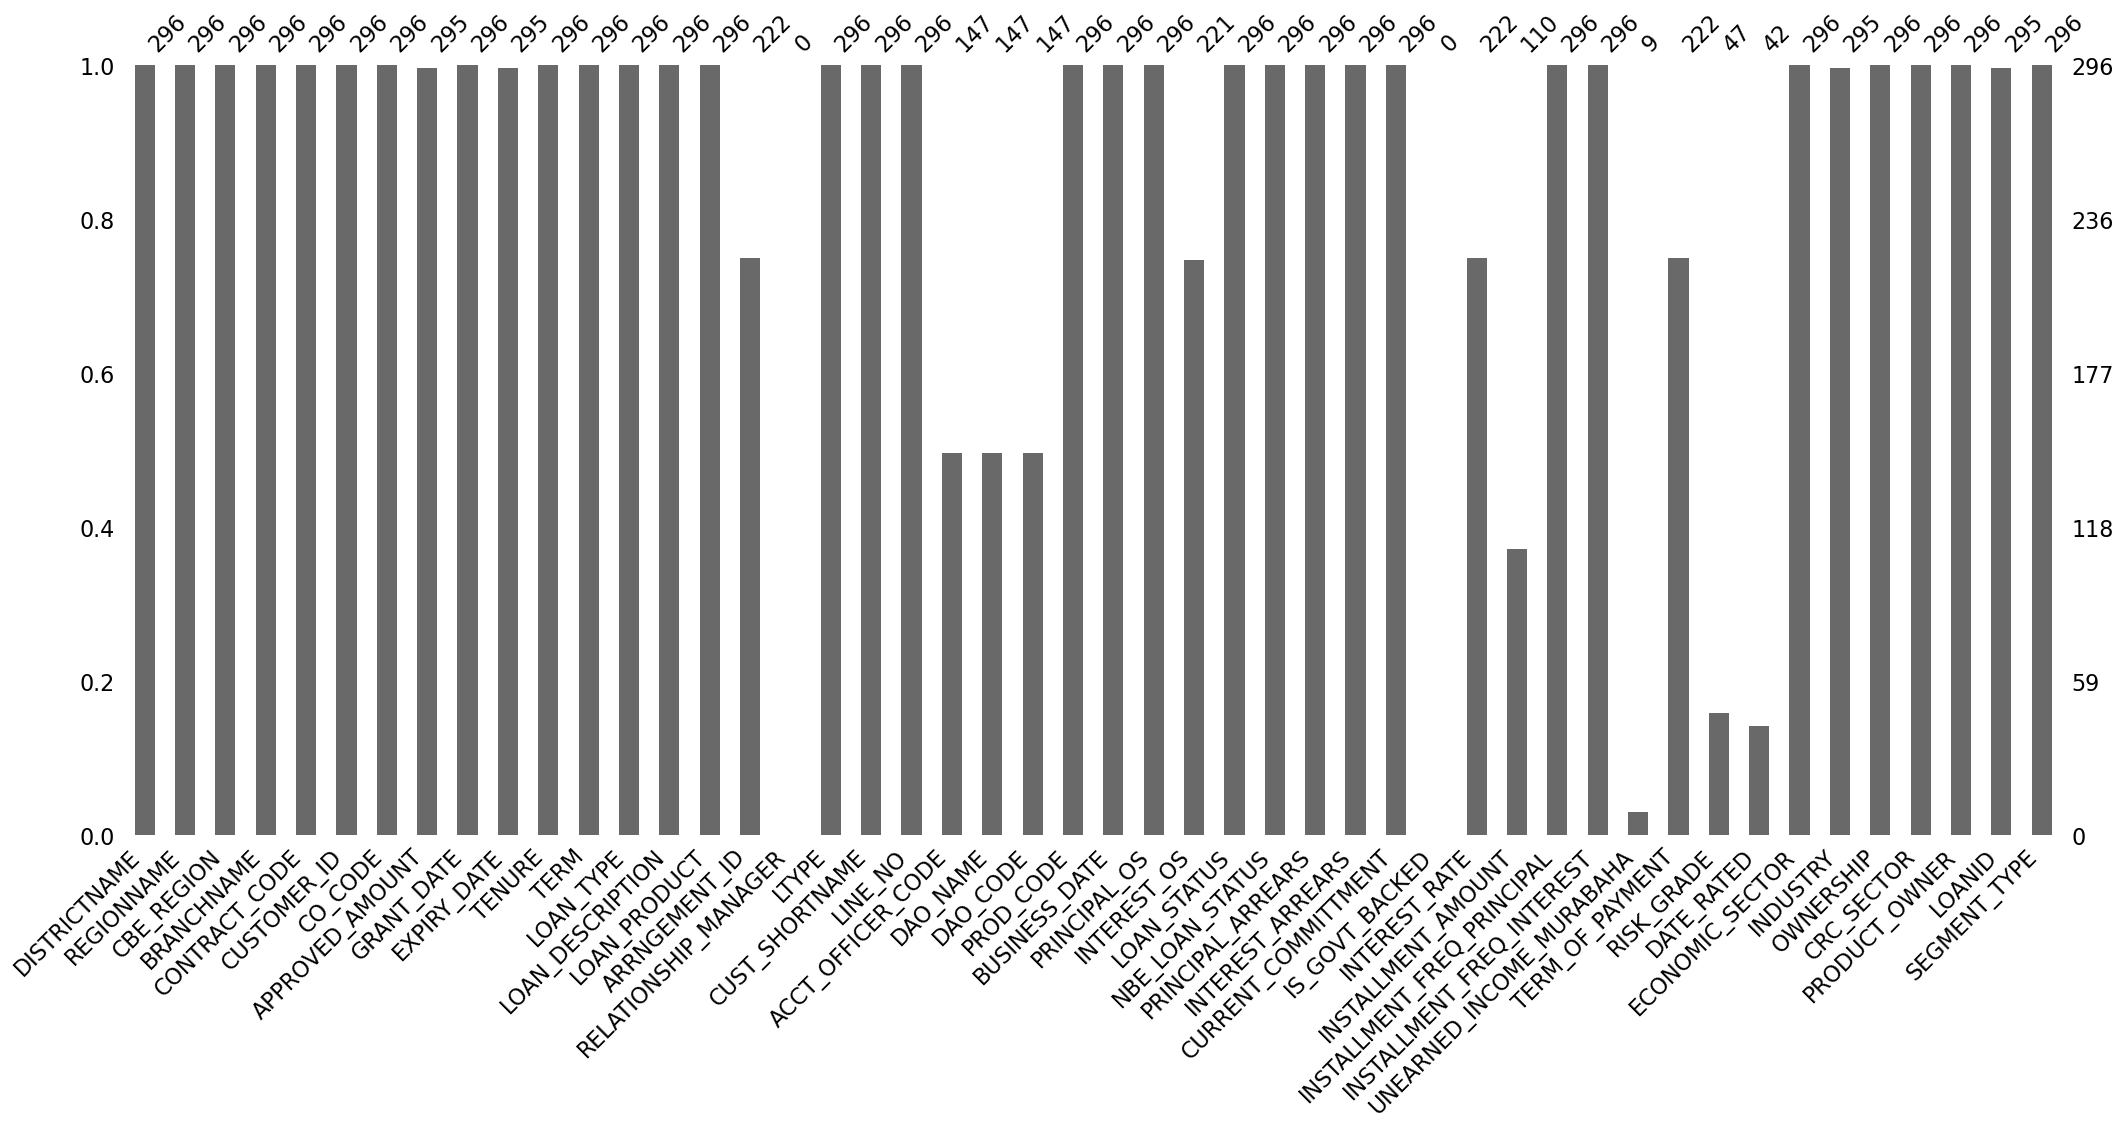

In [10]:
msno.bar(df)

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to display the results
missing_table = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Values (%)': missing_percentage.values
})

# Optional: Set column as index
missing_table.set_index('Column', inplace=True)

# Display the table
print(missing_table)

                            Missing Values (%)
Column                                        
DISTRICTNAME                          0.000000
REGIONNAME                            0.000000
CBE_REGION                            0.000000
BRANCHNAME                            0.000000
CONTRACT_CODE                         0.000000
CUSTOMER_ID                           0.000000
CO_CODE                               0.000000
APPROVED_AMOUNT                       0.337838
GRANT_DATE                            0.000000
EXPIRY_DATE                           0.337838
TENURE                                0.000000
TERM                                  0.000000
LOAN_TYPE                             0.000000
LOAN_DESCRIPTION                      0.000000
LOAN_PRODUCT                          0.000000
ARRNGEMENT_ID                        25.000000
RELATIONSHIP_MANAGER                100.000000
LTYPE                                 0.000000
CUST_SHORTNAME                        0.000000
LINE_NO      

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to display the results
missing_table = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Values (%)': missing_percentage.values
})

# Optional: Set column as index
missing_table.set_index('Column', inplace=True)

# Sort the table in descending order by the percentage of missing values
missing_table.sort_values(by='Missing Values (%)', ascending=False, inplace=True)

# Display the table
print(missing_table)

                            Missing Values (%)
Column                                        
RELATIONSHIP_MANAGER                100.000000
IS_GOVT_BACKED                      100.000000
UNEARNED_INCOME_MURABAHA             96.959459
DATE_RATED                           85.810811
RISK_GRADE                           84.121622
INSTALLMENT_AMOUNT                   62.837838
DAO_NAME                             50.337838
DAO_CODE                             50.337838
ACCT_OFFICER_CODE                    50.337838
INTEREST_OS                          25.337838
TERM_OF_PAYMENT                      25.000000
ARRNGEMENT_ID                        25.000000
INTEREST_RATE                        25.000000
EXPIRY_DATE                           0.337838
APPROVED_AMOUNT                       0.337838
INDUSTRY                              0.337838
LOANID                                0.337838
CURRENT_COMMITTMENT                   0.000000
INTEREST_ARREARS                      0.000000
DISTRICTNAME 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DISTRICTNAME                296 non-null    object        
 1   REGIONNAME                  296 non-null    object        
 2   CBE_REGION                  296 non-null    object        
 3   BRANCHNAME                  296 non-null    object        
 4   CONTRACT_CODE               296 non-null    object        
 5   CUSTOMER_ID                 296 non-null    int64         
 6   CO_CODE                     296 non-null    int64         
 7   APPROVED_AMOUNT             295 non-null    float64       
 8   GRANT_DATE                  296 non-null    datetime64[ns]
 9   EXPIRY_DATE                 295 non-null    datetime64[ns]
 10  TENURE                      296 non-null    object        
 11  TERM                        296 non-null    object        

In [14]:
df.describe()

,CUSTOMER_ID,CO_CODE,APPROVED_AMOUNT,GRANT_DATE,EXPIRY_DATE,RELATIONSHIP_MANAGER,LINE_NO,ACCT_OFFICER_CODE,DAO_CODE,PROD_CODE,...,INTEREST_ARREARS,CURRENT_COMMITTMENT,IS_GOVT_BACKED,INTEREST_RATE,INSTALLMENT_AMOUNT,INSTALLMENT_FREQ_PRINCIPAL,INSTALLMENT_FREQ_INTEREST,UNEARNED_INCOME_MURABAHA,DATE_RATED,LOANID
count,2.960000e+02,296.000000,2.950000e+02,296,295,0.0,296.000000,147.000000,147.000000,296.000000,...,296.000000,2.960000e+02,0.0,222.000000,110.000000,296.0,296.0,9.0,4.200000e+01,2.950000e+02
mean,1.012308e+09,1186.469595,1.603941e+06,2013-08-09 09:53:30.810810880,2029-08-23 02:31:19.322033920,NaN,1564.037162,5029.231293,5029.231293,3294.597973,...,-14.442162,1.589501e+06,NaN,11.797297,294.622818,0.0,0.0,0.0,2.022454e+07,3.417378e+08
min,1.000045e+09,103.000000,0.000000e+00,1996-08-02 00:00:00,1997-08-02 00:00:00,NaN,890.000000,4005.000000,4005.000000,1011.000000,...,-4274.880000,1.000000e-02,NaN,7.000000,0.000000,0.0,0.0,0.0,2.020062e+07,1.032005e+07
25%,1.001426e+09,501.000000,5.278789e+04,2010-07-13 00:00:00,2024-12-13 00:00:00,NaN,1660.000000,5001.000000,5001.000000,3152.250000,...,0.000000,4.285302e+04,NaN,12.000000,0.000000,0.0,0.0,0.0,2.022074e+07,5.011128e+07
50%,1.001668e+09,605.000000,7.111413e+04,2011-06-22 12:00:00,2030-07-07 00:00:00,NaN,1660.000000,5001.000000,5001.000000,3153.000000,...,0.000000,6.801229e+04,NaN,12.000000,0.000000,0.0,0.0,0.0,2.023032e+07,7.041076e+07
75%,1.004045e+09,803.500000,1.198500e+05,2015-09-25 18:00:00,2032-01-29 12:00:00,NaN,1660.000000,5001.500000,5001.500000,3153.000000,...,0.000000,1.001005e+05,NaN,12.000000,221.557500,0.0,0.0,0.0,2.023076e+07,9.201022e+08
max,1.513539e+09,18429.000000,2.230000e+08,2024-04-25 00:00:00,2044-03-11 00:00:00,NaN,1986.000000,6250.000000,6250.000000,21051.000000,...,0.000000,2.230000e+08,NaN,12.000000,4610.770000,0.0,0.0,0.0,2.024033e+07,9.205002e+08
std,4.057011e+07,2594.530779,1.335391e+07,NaN,NaN,NaN,225.722002,525.649267,525.649267,3439.916166,...,248.472353,1.333344e+07,NaN,0.988345,738.723938,0.0,0.0,0.0,9.022927e+03,4.015031e+08


## Required feature that is importanet for loan repayment for predictive model ????
 - collatoral
 - currency type which provieded by broworrs

## Deleting Rows or Columns with 100% Missing Values:

In [15]:
# Check for columns with 100% missing values
missing_columns = df.columns[df.isnull().all()]

# Drop columns with 100% missing values
df.drop(columns=missing_columns, inplace=True)


## Data inconsistency

In [16]:

# Choose the column to check
column_name = "REGIONNAME"

# Check for missing values
missing_values = df[column_name].isnull().sum()
print(f"Number of missing values: {missing_values}")

# Identify unique values (helps spot inconsistencies in formats)
unique_values = df[column_name].unique()
print(f"Unique values: {unique_values}")

# Check for values outside expected range (if applicable)
# if column_name == "price":  # Example for price column
#     min_price = 0  # Assuming no negative prices
#     max_price = 1000  # Set your expected maximum
#     outliers = data[data[column_name] < min_price | data[column_name] > max_price]
#     print(f"Number of outliers: {len(outliers)}")

# Additional checks (replace with your specific logic)
#  * Check for capitalization inconsistencies (e.g., "name" vs. "Name")
#  * Use regular expressions for specific format validation



Number of missing values: 0
Unique values: ['OROMIYA' 'ADDIS ABABA' 'AMHARA' 'TIGRAY' 'South Ethiopia'
 'CENTAL ETHIOPIA' 'SOMALE' 'SIDAMA' 'DIRE DAWA']


###  # Identify numeric columns and categorical columns

In [17]:
# Identify numeric columns
numeric_col = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_col = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Print the lists
print("Numeric columns:", numeric_col)
print("Categorical columns:", categorical_col)


Numeric columns: ['CUSTOMER_ID', 'CO_CODE', 'APPROVED_AMOUNT', 'LINE_NO', 'ACCT_OFFICER_CODE', 'DAO_CODE', 'PROD_CODE', 'BUSINESS_DATE', 'PRINCIPAL_OS', 'INTEREST_OS', 'PRINCIPAL_ARREARS', 'INTEREST_ARREARS', 'CURRENT_COMMITTMENT', 'INTEREST_RATE', 'INSTALLMENT_AMOUNT', 'INSTALLMENT_FREQ_PRINCIPAL', 'INSTALLMENT_FREQ_INTEREST', 'UNEARNED_INCOME_MURABAHA', 'DATE_RATED', 'LOANID']
Categorical columns: ['DISTRICTNAME', 'REGIONNAME', 'CBE_REGION', 'BRANCHNAME', 'CONTRACT_CODE', 'TENURE', 'TERM', 'LOAN_TYPE', 'LOAN_DESCRIPTION', 'LOAN_PRODUCT', 'ARRNGEMENT_ID', 'LTYPE', 'CUST_SHORTNAME', 'DAO_NAME', 'LOAN_STATUS', 'NBE_LOAN_STATUS', 'TERM_OF_PAYMENT', 'RISK_GRADE', 'ECONOMIC_SECTOR', 'INDUSTRY', 'OWNERSHIP', 'CRC_SECTOR', 'PRODUCT_OWNER', 'SEGMENT_TYPE']


In [18]:
Categorical_col= ['DISTRICTNAME', 'REGIONNAME', 'CBE_REGION', 'BRANCHNAME', 'CONTRACT_CODE', 'TENURE', 'TERM', 'LOAN_TYPE', 'LOAN_DESCRIPTION', 'LOAN_PRODUCT', 'ARRNGEMENT_ID', 'LTYPE', 'CUST_SHORTNAME', 'DAO_NAME', 'LOAN_STATUS', 'NBE_LOAN_STATUS', 'TERM_OF_PAYMENT', 'RISK_GRADE', 'ECONOMIC_SECTOR', 'INDUSTRY', 'OWNERSHIP', 'CRC_SECTOR', 'PRODUCT_OWNER', 'SEGMENT_TYPE']

In [19]:
Numeric_col=['CUSTOMER_ID', 'CO_CODE', 'APPROVED_AMOUNT', 'RELATIONSHIP_MANAGER', 'LINE_NO', 'ACCT_OFFICER_CODE', 'DAO_CODE', 'PROD_CODE', 'BUSINESS_DATE', 'PRINCIPAL_OS', 'INTEREST_OS', 'PRINCIPAL_ARREARS', 'INTEREST_ARREARS', 'CURRENT_COMMITTMENT', 'IS_GOVT_BACKED', 'INTEREST_RATE', 'INSTALLMENT_AMOUNT', 'INSTALLMENT_FREQ_PRINCIPAL', 'INSTALLMENT_FREQ_INTEREST', 'UNEARNED_INCOME_MURABAHA', 'DATE_RATED', 'LOANID']

In [20]:
numeric_col

['CUSTOMER_ID',
 'CO_CODE',
 'APPROVED_AMOUNT',
 'LINE_NO',
 'ACCT_OFFICER_CODE',
 'DAO_CODE',
 'PROD_CODE',
 'BUSINESS_DATE',
 'PRINCIPAL_OS',
 'INTEREST_OS',
 'PRINCIPAL_ARREARS',
 'INTEREST_ARREARS',
 'CURRENT_COMMITTMENT',
 'INTEREST_RATE',
 'INSTALLMENT_AMOUNT',
 'INSTALLMENT_FREQ_PRINCIPAL',
 'INSTALLMENT_FREQ_INTEREST',
 'UNEARNED_INCOME_MURABAHA',
 'DATE_RATED',
 'LOANID']

## check misisng value for only catagorical features 

In [21]:
# Check for missing values in categorical columns
missing_values_categorical = df[categorical_col].isnull().sum()

# Filter out columns with no missing values
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

# Print the missing values for each categorical column
print("Missing values in categorical columns:\n", missing_values_categorical)


Missing values in categorical columns:
 ARRNGEMENT_ID       74
DAO_NAME           149
TERM_OF_PAYMENT     74
RISK_GRADE         249
INDUSTRY             1
dtype: int64


## Mode Imputation (Most Frequent Value)

In [22]:
# Fill missing values in categorical columns with the mode
for col in categorical_col:
    df[col].fillna(df[col].mode()[0], inplace=True)


## after flling ther No missied value as shown

In [23]:
missing_values_categorical = df[categorical_col].isnull().sum()

In [24]:
# Check for missing values in categorical columns
missing_values_categorical = df[categorical_col].isnull().sum()

# Filter out columns with no missing values
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

# Print the missing values for each categorical column
print("Missing values in categorical columns:\n", missing_values_categorical)


Missing values in categorical columns:
 Series([], dtype: int64)


## check misisng value for only catagorical features

In [25]:
# Check for missing values in categorical columns
missing_values_categorical = df[numeric_col].isnull().sum()

# Filter out columns with no missing values
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

# Print the missing values for each categorical column
print("Missing values in categorical columns:\n", missing_values_categorical)


Missing values in categorical columns:
 APPROVED_AMOUNT               1
ACCT_OFFICER_CODE           149
DAO_CODE                    149
INTEREST_OS                  75
INTEREST_RATE                74
INSTALLMENT_AMOUNT          186
UNEARNED_INCOME_MURABAHA    287
DATE_RATED                  254
LOANID                        1
dtype: int64


## 1. Mean Imputation:

In [26]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns
df_imputed_mean = pd.DataFrame(imputer.fit_transform(df[numeric_col]), columns=numeric_col)


## 2. KNN Imputation:

In [27]:
from sklearn.impute import KNNImputer

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the numerical columns
df_imputed_knn = pd.DataFrame(imputer.fit_transform(df[numeric_col]), columns=numeric_col)


In [28]:
# Check for missing values in categorical columns
missing_values_categorical = df[numeric_col].isnull().sum()

### Outlier identfication and Removal

##### Outlier Identification Uisng box plot 

### Data tranformation

# Explanatory Data Analytics (EDA)